# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [2]:
df.shape

(6000, 61)

In [3]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [4]:
y.mean()

0.5

In [5]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [6]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          }

# Train all the models
for model in models.keys():
    models[model].fit(X_train, y_train)
    
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
    
# Evaluate each model
from sklearn.metrics import mean_squared_error
from sklearn import metrics

for model in models.keys():
    print(model," mse ",np.sqrt(mean_squared_error(y_pred[model], y_test)))
    print(model," f1 ",metrics.f1_score(y_pred[model], y_test))
    print(model," accuracy ",metrics.accuracy_score(y_pred[model], y_test))




/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr  mse  0.6055300708194983
lr  f1  0.6153846153846154
lr  accuracy  0.6333333333333333
dt  mse  0.6816646291738091
dt  f1  0.5293720459149224
dt  accuracy  0.5353333333333333


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [7]:
#Estimate 300 bagged samples

np.random.seed(123)
n_samples = X_train.shape[0]
n_B = 300
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([3582, 3454, 1346, ..., 2409, 3823,  992]),
 array([ 554, 1524, 1802, ..., 1314,  549, 1303]),
 array([3259,  595,  126, ...,  246, 2641,  580]),
 array([ 918, 1126,  281, ..., 3702, 2706, 2033]),
 array([1803, 3967,  531, ..., 2444, 1572, 3130]),
 array([1128, 3182, 4095, ..., 2716, 2418, 3709]),
 array([1745, 2778, 1040, ..., 1783, 3083, 1198]),
 array([2626, 1128,   88, ..., 1329,  505, 2690]),
 array([3135,   69, 3069, ..., 1821, 1977, 2603]),
 array([2047, 1710,  383, ..., 3887, 2554, 1343]),
 array([4403, 4011, 2930, ..., 2299,  851, 3847]),
 array([ 823, 2283, 1332, ..., 2728, 4452, 1079]),
 array([ 973, 3775, 4336, ..., 1340,   79, 1447]),
 array([ 116, 2089, 3768, ..., 3581, 2923, 1962]),
 array([1320, 3067, 3040, ...,  812, 2636, 3730]),
 array([2392, 3749, 3394, ..., 3691, 2789,  394]),
 array([4494, 2590, 2980, ..., 4198,   57, 3783]),
 array([ 507, 4234,  246, ..., 1597, 4450, 2199]),
 array([3410, 4243,  402, ..., 1381, 3379, 2753]),
 array([2762, 4454, 2143, ..., 

In [29]:
#Estimate the following set of classifiers:
#100 Decision Trees where max_depth=None
#100 Decision Trees where max_depth=2
#100 Logistic Regressions

seeds = np.random.randint(1, 10000, size=n_B)

trees = {}
for i in range(0,100):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

for i in range(100,200):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
for i in range(200,300):
    trees[i] = LogisticRegression(random_state=seeds[i],solver='liblinear')
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [9]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_B)))
for i in range(n_B):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,0,1,0,1,0,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
2185,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,0,0,0,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [10]:
#Ensemble using majority voting
y_pred_df.sum(axis=1)[:10]

1483    252
2185    252
2520    214
3721    261
3727     46
4524    114
234      25
4735     53
5839    128
2939    225
dtype: int64

In [11]:
y_pred = (y_pred_df.sum(axis=1) >= (n_B / 2)).astype(np.int)

from sklearn import metrics
print("f1 score: ",metrics.f1_score(y_pred, y_test))
print("accuracy: ",metrics.accuracy_score(y_pred, y_test))

f1 score:  0.6257839721254356
accuracy:  0.642


# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [12]:
probability = y_pred_df.sum(axis=1) / n_B
probability.head()

1483    0.840000
2185    0.840000
2520    0.713333
3721    0.870000
3727    0.153333
dtype: float64

In [13]:
step_nums = 20
nums = np.arange(0, 300, step=step_nums)
nums

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280])

In [14]:
probs = nums/n_B
probs

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333])

In [15]:
len(probs)

15

In [16]:
iter=[]
for i in range(15):
    y_pred_f1 = (y_pred_df.sum(axis=1)/n_B >= probs[i]).astype(np.int)
    iter.append([i,probs[i],metrics.f1_score(y_pred_f1, y_test)])
    
iter.sort(key=lambda x: x[2], reverse = True)
print(iter[0])
print ("\n")
print ("La probabilidad que maximiza el f-score es: Prob=0.2 , con un f1-score= 0.71")

[3, 0.2, 0.7073552425665103]


La probabilidad que maximiza el f-score es: Prob=0.2 , con un f1-score= 0.71


# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [17]:
#Select each oob sample

samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [18]:
#Estimate the oob error of each classifier

errors = np.zeros(n_B)

for i in range(n_B):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5,1,'OOB error of each tree')

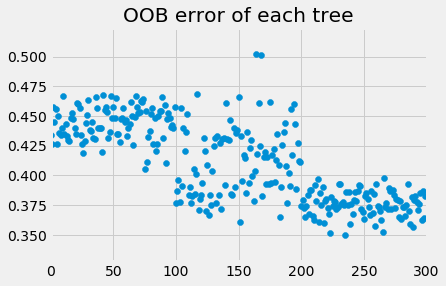

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_B), errors)
plt.xlim([0, n_B])
plt.title('OOB error of each tree')

In [20]:
# Estimate $\alpha$
alpha = (1 - errors) / (1 - errors).sum()
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

1483    0.849671
2185    0.847961
2520    0.727198
3721    0.877486
3727    0.144794
4524    0.372129
234     0.078674
4735    0.168500
5839    0.427296
2939    0.760578
3053    0.793252
867     0.797785
276     0.900404
5798    0.123353
3512    0.873907
5789    0.105038
3198    0.787513
5908    0.906032
5718    0.160971
2687    0.127297
dtype: float64

In [21]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

print("f1: ",metrics.f1_score(y_pred, y_test))
print("accuracy: ",metrics.accuracy_score(y_pred, y_test))

f1:  0.6252616887648289
accuracy:  0.642


# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [22]:
weighted=[]
for i in range(15):
    y_pred_w = (weighted_sum_1 >= probs[i]).astype(np.int)
    weighted.append([i,probs[i],metrics.f1_score(y_pred_w, y_test)])

weighted

[[0, 0.0, 0.6702127659574468],
 [1, 0.06666666666666667, 0.6747529200359388],
 [2, 0.13333333333333333, 0.699711260827719],
 [3, 0.2, 0.7055084745762711],
 [4, 0.26666666666666666, 0.690337601862631],
 [5, 0.3333333333333333, 0.6699999999999999],
 [6, 0.4, 0.6504599211563732],
 [7, 0.4666666666666667, 0.6328767123287671],
 [8, 0.5333333333333333, 0.6109921484653819],
 [9, 0.6, 0.6023738872403561],
 [10, 0.6666666666666666, 0.566953797963978],
 [11, 0.7333333333333333, 0.5223251895534962],
 [12, 0.8, 0.4331450094161959],
 [13, 0.8666666666666667, 0.20393974507531862],
 [14, 0.9333333333333333, 0.010498687664041996]]

In [23]:
weighted.sort(key=lambda x: x[2], reverse = True)
print(weighted[0])
print ("\n")
print ("La probabilidad que maximiza el f-score es: Prob=0.2 , con un f1-score= 0.71")

[3, 0.2, 0.7055084745762711]


La probabilidad que maximiza el f-score es: Prob=0.2 , con un f1-score= 0.71


# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [24]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_B)))

for i in range(n_B):
    X_train_2[i] = trees[i].predict(X_train)
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,1,0,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
5863,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,1
86,0,1,0,1,1,0,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1


In [25]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [26]:
y_pred = lr.predict(y_pred_df)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6573705179282868, 0.656)

In [34]:
y_pred = (lr.predict_proba(y_pred_df)[:,1]>=0.5).astype(np.int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6573705179282868, 0.656)

In [35]:
stacked=[]
for i in range(15):
    y_pred_s = (lr.predict_proba(y_pred_df)[:,1]>=probs[i]).astype(np.int)
    stacked.append([i,probs[i],metrics.f1_score(y_pred_s, y_test)])

stacked

/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


[[0, 0.0, 0.6702127659574468],
 [1, 0.06666666666666667, 0.6702127659574468],
 [2, 0.13333333333333333, 0.6702127659574468],
 [3, 0.2, 0.675067506750675],
 [4, 0.26666666666666666, 0.698292220113852],
 [5, 0.3333333333333333, 0.7126673532440783],
 [6, 0.4, 0.6988636363636365],
 [7, 0.4666666666666667, 0.6789107029765674],
 [8, 0.5333333333333333, 0.6377014716187807],
 [9, 0.6, 0.5652522017614091],
 [10, 0.6666666666666666, 0.44319248826291086],
 [11, 0.7333333333333333, 0.24107142857142855],
 [12, 0.8, 0.038709677419354833],
 [13, 0.8666666666666667, 0.0],
 [14, 0.9333333333333333, 0.0]]

In [39]:
stacked.sort(key=lambda x: x[2], reverse = True)
print(stacked[0])
print ("\n")
print ("La probabilidad que maximiza el f-score es: Prob=",stacked[0][1]," , con un f1-score= ",stacked[0][2])

[5, 0.3333333333333333, 0.7126673532440783]


La probabilidad que maximiza el f-score es: Prob= 0.3333333333333333  , con un f1-score=  0.7126673532440783
